In [279]:
%matplotlib inline

In [280]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
from scipy.stats import linregress
from sklearn import datasets
import seaborn as sns

In [281]:
data_00s = "data/hit_predictor/dataset-of-00s.csv"
data_2000 = "data/song_attributes/2000.csv"
spotify_tracks_db = "data/spotify_tracks_db/SpotifyFeatures.csv"

# Read Data File and store into Pandas DataFrames
data_00s = pd.read_csv(data_00s)
data_2000 = pd.read_csv(data_2000)
spotify_df = pd.read_csv(spotify_tracks_db)

In [282]:
data_00s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [283]:
data_2000.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,In the End,Linkin Park,alternative metal,2000,105,86,56,-6,21,40,217,1,6,83
1,2,The Scientist,Coldplay,permanent wave,2002,146,44,56,-7,11,21,310,73,2,83
2,3,Numb,Linkin Park,alternative metal,2003,110,86,50,-4,64,24,186,0,4,81
3,4,Fix You,Coldplay,permanent wave,2005,138,42,21,-9,11,12,296,16,3,81
4,5,Umbrella,Rihanna,barbadian pop,2008,174,83,58,-5,4,57,276,1,13,80


In [284]:
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [285]:
popularity_track = spotify_df['popularity'].value_counts()

In [286]:
most_popular_df = spotify_df.sort_values(by ='popularity', ascending=False)

In [287]:
most_popular_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335


In [288]:
least_popular_df = spotify_df.sort_values(by ='popularity', ascending=True)

In [289]:
least_popular_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.0000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",3WaCwwpGoxLEkFmd6cpZO5,0,0.1390,0.556,150487,0.439,0.0064,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,5yDehr9ccZo3vBO8hZXFcK,0,0.2130,0.736,212547,0.446,0.8210,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,6NEULw7AmTOAYRunPWcFvn,0,0.0131,0.639,184000,0.844,0.0957,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,6v126eNn1A79yFIKGfvqLz,0,0.0280,0.607,147653,0.554,0.0000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404


In [290]:
zero_popularity_df = spotify_df[spotify_df['popularity']==0].groupby(['popularity'])

In [291]:
zero_popularity_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
10,Movie,Leopold Stokowski,Symphony No.4 In E Minor Op.98 : IV. Allegro E...,0XKgegoxLcIihK3Klpfo3N,0,0.92100,0.191,566960,0.1450,0.52900,E,0.1410,-17.239,Minor,0.0393,85.225,4/4,0.0849


In [292]:
#Visualizing one of the duplicate entry
data_tracks=spotify_df.set_index('track_id')
track=data_tracks.loc['6sVQNUvcVFTXvlk3ec0ngd']
track

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
6sVQNUvcVFTXvlk3ec0ngd,Alternative,Cocteau Twins,Cherry-coloured Funk,57,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Dance,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Electronic,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Folk,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Children’s Music,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Indie,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Rock,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,World,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365


In [293]:
drop_duplicates_tracks=spotify_df.drop_duplicates(subset=['track_id']).drop(columns=['popularity','genre'])
drop_duplicates_tracks

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [294]:
#Grouping by track id and take the average for each track popularity
genres_group=pd.DataFrame(spotify_df.groupby(['track_id'])['popularity'].mean())
genres_group=genres_group.reset_index()
genres_group

,track_id,popularity
0,00021Wy6AyMbLP2tqij86e,13.0
1,000CzNKC8PEt1yC3L8dqwV,5.0
2,000DfZJww8KiixTKuk9usJ,30.0
3,000EWWBkYaREzsBplYjUag,39.0
4,000xQL6tZNLJzIrtIgxqSl,70.0
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,38.0
176770,7zzFNNxVD0h0ctAT08H0pa,40.0
176771,7zzTeItz93lYI52hlcipm5,28.0
176772,7zzZmpw8L66ZPjH1M6qmOs,67.0


In [295]:
#merging the popularity mean to the clean data
clean_data1=pd.merge(drop_duplicates_tracks,genres_group,how='left',on='track_id')
clean_data1

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0.0
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1.0
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3.0
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0.0
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770,39.0
176770,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482,43.0
176771,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497,32.0
176772,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,38.0


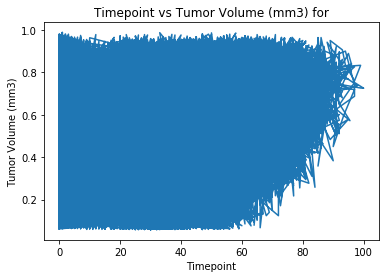

In [296]:
plt.plot(clean_data1["popularity"], clean_data1["danceability"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3) for")
plt.show()

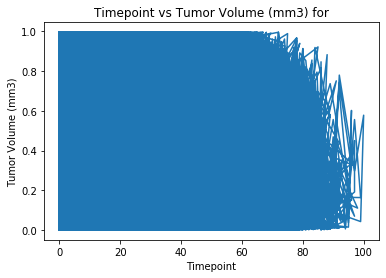

In [297]:
plt.plot(clean_data1["popularity"], clean_data1["acousticness"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3) for")
plt.show()

The correlation coefficient between Weight (g) and Tumor Volume (mm3) is -0.36


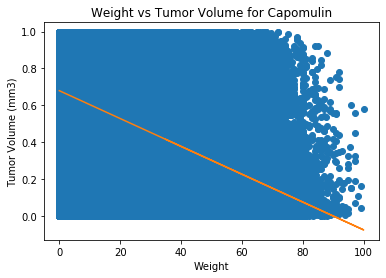

In [298]:
x = clean_data1["popularity"]
y = clean_data1["acousticness"]
#correlation coefficient
print(f"The correlation coefficient between Weight (g) and Tumor Volume (mm3) is {round(st.pearsonr(x,y)[0],2)}")
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [299]:
correlation_df = spotify_df.corr()

In [300]:
correlation_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [301]:
genre_df = spotify_df.set_index("genre")

In [302]:
genre_df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813


In [303]:
genre_df['track_name'].value_counts()

Home                                                                    100
You                                                                      71
Intro                                                                    69
Stay                                                                     63
Wake Up                                                                  59
                                                                       ... 
Tu vas me détruire - Live                                                 1
Final Boss (Wavedash Remix)                                               1
Turn & Wine                                                               1
Can't Help Falling In Love - From "Lilo & Stitch"/Soundtrack Version      1
Little Lennon                                                             1
Name: track_name, Length: 148615, dtype: int64

In [304]:
spotify_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [305]:
anime= spotify_df.loc[spotify_df['genre'] == 'Electronic']['popularity']
dance= spotify_df.loc[spotify_df['genre'] == 'Anime']['popularity']
electronic=spotify_df.loc[spotify_df['genre'] == 'Dance']['popularity']
movie= spotify_df.loc[spotify_df['genre'] == 'Movie']['popularity']
rock= spotify_df.loc[spotify_df['genre'] == 'Rock']['popularity']
pop=spotify_df.loc[spotify_df['genre'] == 'Pop']['popularity']
world=spotify_df.loc[spotify_df['genre'] == 'World']['popularity']
classical=spotify_df.loc[spotify_df['genre'] == 'Classical']['popularity']
rap=spotify_df.loc[spotify_df['genre'] == 'Rap']['popularity']

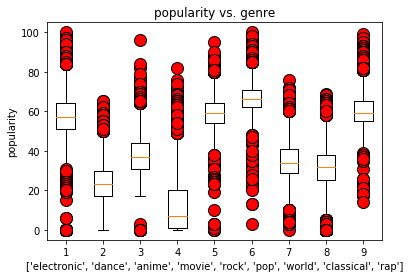

In [306]:
treatments = ["electronic", "dance", "anime", "movie", "rock", "pop", "world", "classical", "rap"]

format_red = dict(markerfacecolor='red',markersize=12)
regimens = [electronic, dance, anime, movie, rock, pop, world, classical, rap]
fig1, ax1 = plt.subplots()
ax1.set_title('popularity vs. genre')
ax1.set_ylabel('popularity')
ax1.set_xlabel(treatments)
ax1.boxplot(regimens, flierprops=format_red)
plt.show()

In [307]:
genre_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [308]:
electronic_df = spotify_df.loc[spotify_df['genre'] == 'Electronic']

In [309]:
electronic_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.017929,0.057381,0.011860,-0.043567,-0.074783,-0.052248,-0.008230,-0.089961,-0.025668,0.036682
acousticness,0.017929,1.000000,-0.075349,0.038292,-0.527176,0.178686,-0.092460,-0.501651,-0.109533,-0.109067,-0.053871
danceability,0.057381,-0.075349,1.000000,0.016390,-0.059087,0.032216,-0.125103,-0.021120,0.043055,-0.134525,0.384603
duration_ms,0.011860,0.038292,0.016390,1.000000,-0.134914,0.216004,-0.067747,-0.243060,-0.132091,-0.042467,-0.052154
energy,-0.043567,-0.527176,-0.059087,-0.134914,1.000000,-0.207925,0.207432,0.755937,0.237429,0.196588,0.122855
instrumentalness,-0.074783,0.178686,0.032216,0.216004,-0.207925,1.000000,-0.080800,-0.413765,-0.235743,-0.022248,-0.081373
liveness,-0.052248,-0.092460,-0.125103,-0.067747,0.207432,-0.080800,1.000000,0.169193,0.149744,0.039895,-0.033609
loudness,-0.008230,-0.501651,-0.021120,-0.243060,0.755937,-0.413765,0.169193,1.000000,0.270619,0.149145,0.047585
speechiness,-0.089961,-0.109533,0.043055,-0.132091,0.237429,-0.235743,0.149744,0.270619,1.000000,0.095862,0.001441
tempo,-0.025668,-0.109067,-0.134525,-0.042467,0.196588,-0.022248,0.039895,0.149145,0.095862,1.000000,-0.021171


In [310]:
classical_df = spotify_df.loc[spotify_df['genre'] == 'Classical']

In [311]:
classical_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.180424,-0.018453,0.004331,0.144139,0.150804,-0.220208,0.079918,-0.142041,-0.008067,-0.047427
acousticness,-0.180424,1.000000,-0.204834,-0.004974,-0.871558,0.329871,-0.129844,-0.631626,-0.122560,-0.245608,-0.175767
danceability,-0.018453,-0.204834,1.000000,-0.215139,0.312399,-0.131024,0.072288,0.258717,0.217960,0.199251,0.605817
duration_ms,0.004331,-0.004974,-0.215139,1.000000,-0.008549,0.043631,0.003955,0.070535,-0.080752,-0.031271,-0.249719
energy,0.144139,-0.871558,0.312399,-0.008549,1.000000,-0.335793,0.206435,0.807364,0.168231,0.286992,0.333402
instrumentalness,0.150804,0.329871,-0.131024,0.043631,-0.335793,1.000000,-0.276332,-0.336109,-0.225414,-0.118518,-0.109845
liveness,-0.220208,-0.129844,0.072288,0.003955,0.206435,-0.276332,1.000000,0.191707,0.275173,0.048320,0.109508
loudness,0.079918,-0.631626,0.258717,0.070535,0.807364,-0.336109,0.191707,1.000000,0.064884,0.249911,0.274684
speechiness,-0.142041,-0.122560,0.217960,-0.080752,0.168231,-0.225414,0.275173,0.064884,1.000000,0.072258,0.113469
tempo,-0.008067,-0.245608,0.199251,-0.031271,0.286992,-0.118518,0.048320,0.249911,0.072258,1.000000,0.233509


In [312]:
world_df = spotify_df.loc[spotify_df['genre'] == 'World']

In [313]:
world_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.038846,-0.026585,-0.000226,-0.004413,-0.097664,0.015092,0.062248,-0.069074,0.023015,-0.055602
acousticness,-0.038846,1.000000,-0.245731,-0.004059,-0.745225,0.451898,-0.266203,-0.675695,-0.030897,-0.244738,-0.118320
danceability,-0.026585,-0.245731,1.000000,-0.127392,0.416655,-0.153276,-0.007932,0.374421,0.160767,0.044096,0.618169
duration_ms,-0.000226,-0.004059,-0.127392,1.000000,-0.038947,0.068836,0.014292,-0.063945,-0.030283,0.001465,-0.133039
energy,-0.004413,-0.745225,0.416655,-0.038947,1.000000,-0.426104,0.343728,0.784944,0.175724,0.253595,0.441736
instrumentalness,-0.097664,0.451898,-0.153276,0.068836,-0.426104,1.000000,-0.215290,-0.658814,0.038924,-0.188713,-0.114775
liveness,0.015092,-0.266203,-0.007932,0.014292,0.343728,-0.215290,1.000000,0.251433,0.140770,0.077894,0.032937
loudness,0.062248,-0.675695,0.374421,-0.063945,0.784944,-0.658814,0.251433,1.000000,-0.004761,0.269052,0.281129
speechiness,-0.069074,-0.030897,0.160767,-0.030283,0.175724,0.038924,0.140770,-0.004761,1.000000,0.057218,0.204750
tempo,0.023015,-0.244738,0.044096,0.001465,0.253595,-0.188713,0.077894,0.269052,0.057218,1.000000,0.053639


In [314]:
rap_df = spotify_df.loc[spotify_df['genre'] == 'Rap']

In [315]:
rap_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.008856,0.060827,-0.018356,-0.041114,-0.007325,-0.058562,0.068479,-0.081633,0.017122,0.000892
acousticness,0.008856,1.000000,-0.044776,-0.035848,-0.314802,0.071091,-0.041794,-0.283500,0.102392,-0.088897,0.015174
danceability,0.060827,-0.044776,1.000000,-0.150053,-0.251206,-0.047976,-0.144971,-0.109477,0.066320,-0.052913,0.182021
duration_ms,-0.018356,-0.035848,-0.150053,1.000000,0.109051,-0.037980,0.065708,0.078636,-0.001149,-0.064666,-0.009157
energy,-0.041114,-0.314802,-0.251206,0.109051,1.000000,-0.081117,0.173353,0.695415,-0.061481,0.047742,0.292005
instrumentalness,-0.007325,0.071091,-0.047976,-0.037980,-0.081117,1.000000,-0.011685,-0.164037,-0.108314,0.001413,-0.069887
liveness,-0.058562,-0.041794,-0.144971,0.065708,0.173353,-0.011685,1.000000,0.077340,0.097998,-0.011493,0.045792
loudness,0.068479,-0.283500,-0.109477,0.078636,0.695415,-0.164037,0.077340,1.000000,-0.145452,0.054793,0.170060
speechiness,-0.081633,0.102392,0.066320,-0.001149,-0.061481,-0.108314,0.097998,-0.145452,1.000000,0.037219,0.106473
tempo,0.017122,-0.088897,-0.052913,-0.064666,0.047742,0.001413,-0.011493,0.054793,0.037219,1.000000,-0.046153


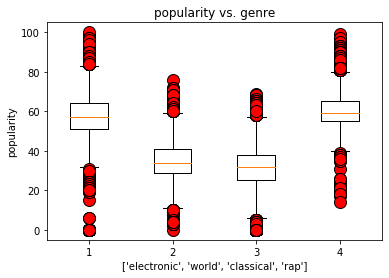

In [316]:
genres = ["electronic", "world", "classical", "rap"]

format_red = dict(markerfacecolor='red',markersize=12)
regimens = [electronic, world, classical, rap]
fig1, ax1 = plt.subplots()
ax1.set_title('popularity vs. genre')
ax1.set_ylabel('popularity')
ax1.set_xlabel(genres)
ax1.boxplot(regimens, flierprops=format_red)
plt.show()

In [317]:
electronic=spotify_df.loc[spotify_df['genre'] == 'Dance']['danceability']
world=spotify_df.loc[spotify_df['genre'] == 'World']['danceability']
classical=spotify_df.loc[spotify_df['genre'] == 'Classical']['danceability']
rap=spotify_df.loc[spotify_df['genre'] == 'Rap']['danceability']

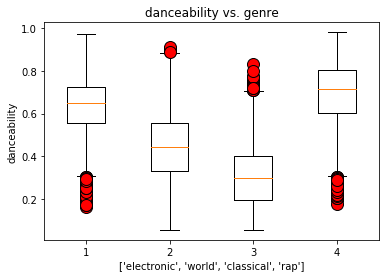

In [318]:
genres = ["electronic", "world", "classical", "rap"]

format_red = dict(markerfacecolor='red',markersize=12)
regimens = [electronic, world, classical, rap]
fig1, ax1 = plt.subplots()
ax1.set_title('danceability vs. genre')
ax1.set_ylabel('danceability')
ax1.set_xlabel(genres)
ax1.boxplot(regimens, flierprops=format_red)
plt.show()

In [322]:
electronic=spotify_df.loc[spotify_df['genre'] == 'Dance']['energy']
world=spotify_df.loc[spotify_df['genre'] == 'World']['energy']
classical=spotify_df.loc[spotify_df['genre'] == 'Classical']['energy']
rap=spotify_df.loc[spotify_df['genre'] == 'Rap']['energy']

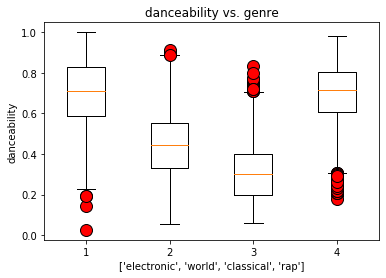

In [320]:
genres = ["electronic", "world", "classical", "rap"]

format_red = dict(markerfacecolor='red',markersize=12)
regimens = [electronic, world, classical, rap]
fig1, ax1 = plt.subplots()
ax1.set_title('danceability vs. genre')
ax1.set_ylabel('danceability')
ax1.set_xlabel(genres)
ax1.boxplot(regimens, flierprops=format_red)
plt.show()

In [ ]:
df = electronic_df[['acousticness','danceability','energy','acousticness']]

sns.pairplot(df, kind="scatter")
plt.show()

,acousticness,danceability,energy,acousticness
22169,0.153000,0.841,0.798,0.153000
22170,0.077100,0.652,0.713,0.077100
22171,0.074200,0.536,0.879,0.074200
22172,0.020300,0.586,0.701,0.020300
22173,0.000726,0.793,0.703,0.000726
...,...,...,...,...
40489,0.002640,0.633,0.996,0.002640
40490,0.003570,0.484,0.989,0.003570
40491,0.010700,0.894,0.874,0.010700
40492,0.371000,0.495,0.419,0.371000
